In [1]:
#------Librerías
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.mlab import bivariate_normal
from random import randint

import plotly 
plotly.tools.set_credentials_file(username='tareasparabacho', api_key='dKoPL05HjijCFJzUdMza')
import plotly.plotly as py
import plotly.graph_objs as go

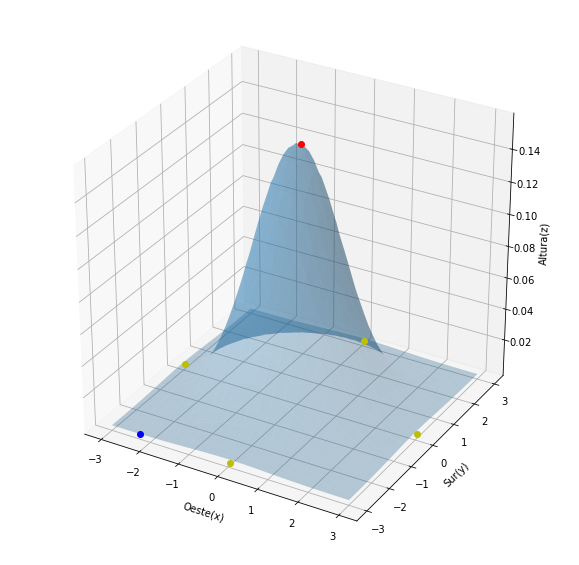

In [9]:
#------Generar datos del terreno (colina)
lim = 3
n=50
a = randint(0, n-1)
b = randint(0, n-1)
xc = np.linspace(-lim, lim, n)
yc = np.linspace(-lim, lim, n)
xc, yc = np.meshgrid(xc, yc)
zc = bivariate_normal(xc, yc)
#Posición cordenadas
coord = np.array([[xc[0,0],yc[n/2,n/2],zc[0,0]], #norte
        [xc[n-1,n-1],yc[n/2,n/2],zc[0,0]],  #sur
        [xc[n/2,n/2],yc[n-1,n-1],zc[0,0]],  #este
        [xc[n/2,n/2],yc[0,0],zc[0,0]]]) #Oeste
#Posición del árbol
tree = [xc[n/2,n/2],yc[n/2,n/2],zc[n/2,n/2]]
#Posición inicial
pos = [xc[a,a], yc[b,b],zc[a,b]]
posIni = pos
#------Gráfica
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xc, yc, zc, rstride=2, cstride=2, alpha=0.3)
ax.plot([tree[0]],[tree[1]],[tree[2]], 'ro')
ax.plot([pos[0]],[pos[1]],[pos[2]], 'bo')
ax.plot(coord[:,0],coord[:,1],coord[:,2], 'yo')#Norte
#Ejes:
ax.set_xlabel('Oeste(x)')
ax.set_ylabel('Sur(y)')
ax.set_zlabel('Altura(z)')
#Crear gráfica
plt.show()

In [10]:
#Función que calcula la distancia euclidiana entre dos puntos:
def dist(a,b):
    xp = (a[0]-b[0])
    yp = (a[1]-b[1])
    zp = (a[2]-b[2])
    d = (xp**2+yp**2+zp**2)**0.5
    return d
#Funcion que regresa la pista olfativa de los cuatro puntos cardinales
def odor(pos):
    N = 1.0/dist(pos, coord[0])
    S = 1.0/dist(pos, coord[1])
    E = 1.0/dist(pos, coord[2])
    O = 1.0/dist(pos, coord[3])
    return np.array([N,S,E,O])
#Función que regresa la recompensa, aumenta cuando se acerca a la meta.
def payoff(pos):
    return 1.0/dist(pos,tree)

#Función que regresa la salida final de la red
def finalOutput(outputs):
    y1 = 1 if(outputs[0]>outputs[1]) else 0
    y2 = outputs[1] and (not y1)
    y3 = 1 if(outputs[2]>outputs[3]) else 0
    y4 = outputs[3] and (not y3)
    return np.array([y1,y2,y3,y4])

def graficaCamino():
    colina = go.Surface(x=xc,y=yc,z=zc)
    arbol = go.Scatter3d(x=[tree[0]], y=[tree[1]], z=[tree[2]])
    cardinales = go.Scatter3d(x=coord[:,0], y=coord[:,1], z=coord[:,2])
    cam = go.Scatter3d(x=camino[:,0], y=camino[:,1], z=camino[:,2])
    data = [colina, arbol, cardinales, cam]
    layout = go.Layout(
        title='Camino seguido por el robot',
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='camino')

def graficaCamino2():
    #------Gráfica
    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(xc, yc, zc, rstride=2, cstride=2, alpha=0.3)
    ax.plot([tree[0]],[tree[1]],[tree[2]], 'ro')
    ax.plot([pos[0]],[pos[1]],[pos[2]], 'bo')
    ax.plot(coord[:,0],coord[:,1],coord[:,2], 'yo')#Norte
    ax.plot(camino[:,0],camino[:,1],camino[:,2], 'go')#camino
    #Ejes:
    ax.set_xlabel('SOUTH(x)')
    ax.set_ylabel('EAST(y)')
    ax.set_zlabel('HIGH(z)')
    #Crear gráfica
    plt.show()

In [11]:
#Inicializar pesos
w = np.zeros((4,4)) #Los pesos son por columbna
#Pasos del robot:
m = 1000
rvar = 3 #Varianza del ruido
print "Pesos:\n",w

Pesos:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


C:\Users\gmondrags\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning:

invalid value encountered in greater



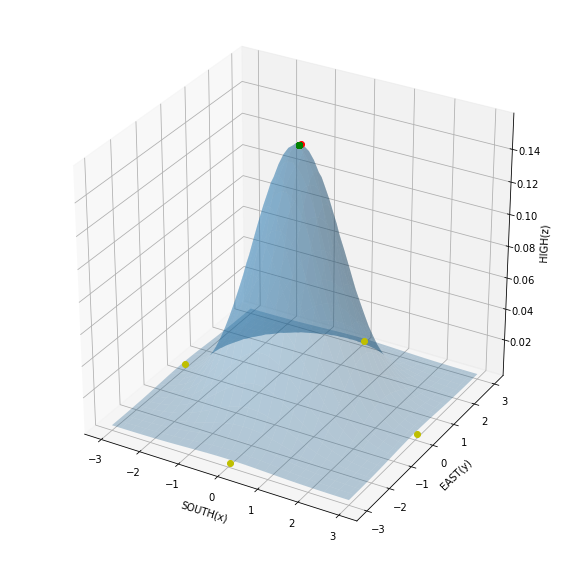

In [20]:
pos = posIni
camino = np.zeros((m,3))
for i in range(0,m):
    #Calculando métricas
    x = odor(pos)
    s = np.dot(x,w)
    #Agregar ruido a la salida
    noise = np.array([np.random.normal(0,rvar),
                      np.random.normal(0,rvar),
                      np.random.normal(0,rvar),
                      np.random.normal(0,rvar)])
    #Salida de la red
    y = s + noise > 0
    y = finalOutput(y)
    #Nueva posición
    a = a + y[0] - y[1]
    b = b + y[2] - y[3]
    
    #Verificar límites
    if (a>=n): a=a-1 
    else:
        if (a<=0): a=a+1
    if (b>=n): b=b-1 
    else: 
        if (b<=0): b=b+1
            
    pos = [xc[a,a], yc[b,b],zc[a,b]]

    camino[i] = pos
    
graficaCamino2()

C:\Users\gmondrags\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\gmondrags\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning:

invalid value encountered in multiply

C:\Users\gmondrags\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning:

invalid value encountered in greater

C:\Users\gmondrags\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning:

invalid value encountered in add



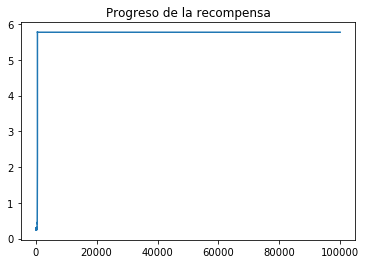

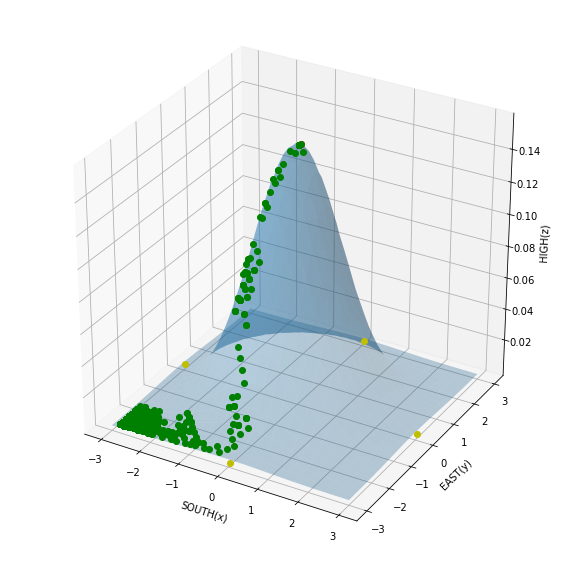

In [18]:
pos = posIni
zs = np.zeros(m)
camino = np.zeros((m,3))
for i in range(0,m):
    #Calculando métricas
    x = odor(pos)
    z = payoff(pos)
    s = np.dot(x,w)
    #Agregar ruido a la salida
    rvar = 1
    noise = np.array([np.random.normal(0,rvar),
                      np.random.normal(0,rvar),
                      np.random.normal(0,rvar),
                      np.random.normal(0,rvar)])
    #Salida de la red
    y = s + noise > 0
    y = finalOutput(y)
    #Nueva posición
    a = a + y[0] - y[1]
    b = b + y[2] - y[3]
    
    #Verificar límites
    if (a>=n): a=a-1 
    else:
        if (a<=0): a=a+1
    if (b>=n): b=b-1 
    else: 
        if (b<=0): b=b+1
            
    pos = [xc[a,a], yc[b,b],zc[a,b]]
    #Nueva recompensa
    zn = payoff(pos)
    zs[i] = z
    #Actualizar pesos
    c = 0.25
    w = w + c*(zn-z)*y*x
    camino[i] = pos
    
plt.plot(range(0,m),zs)
plt.title("Progreso de la recompensa")
plt.show()

graficaCamino2()

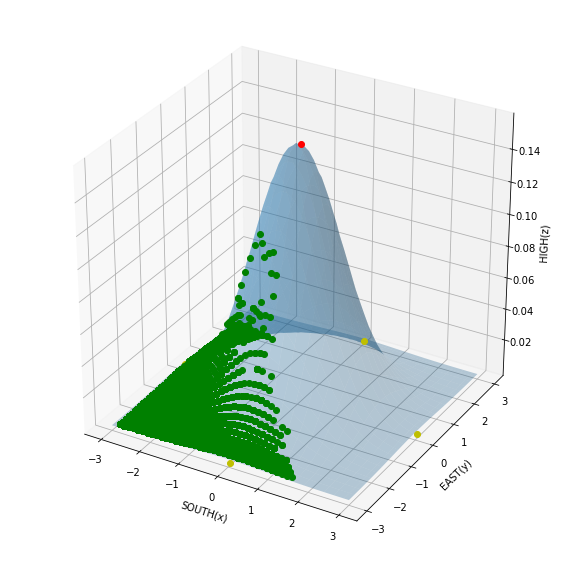

In [17]:
pos = posIni
m = 100000
camino = np.zeros((m,3))
for i in range(0,m):
    #Calculando métricas
    x = odor(pos)
    s = np.dot(x,w)
    #Agregar ruido a la salida
    rvar = 1
    noise = np.array([np.random.normal(0,rvar),
                      np.random.normal(0,rvar),
                      np.random.normal(0,rvar),
                      np.random.normal(0,rvar)])
    #Salida de la red
    y = s + noise > 0
    y = finalOutput(y)
    #Nueva posición
    a = a + y[0] - y[1]
    b = b + y[2] - y[3]
    
    #Verificar límites
    if (a>=n): a=a-1 
    else:
        if (a<=0): a=a+1
    if (b>=n): b=b-1 
    else: 
        if (b<=0): b=b+1
            
    pos = [xc[a,a], yc[b,b],zc[a,b]]
    
    camino[i] = pos
    
graficaCamino2()

In [15]:
#Se podría agregar inhibición lateral en las señales de salida para cuando norte está activado decrementear el peso de sur si no está activado.